## Problem Summary:

With million of apps around nowadays, mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user. This data set contains more than 7000 Apple iOS mobile application details, e.g. size, price, genre, rating_count, description and etc. The data was extracted from the iTunes Search API at the Apple Inc website. The goal is to predict whether the overall rating for the app is more than 4 stars (1=yes, 0=no), which we think it a very good app

## Modeling

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.getcwd()
path = '/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/data'
os.chdir(path)

In [50]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
X_test = pd.read_csv('X_test.csv', index_col = 0)
y_train = pd.read_csv('y_train.csv', index_col = 0)
y_test = pd.read_csv('y_test.csv', index_col = 0)
df = pd.read_csv('step2_output2.csv', index_col=0)

In [49]:
X_train.shape, y_train.shape

((3453, 4916), (3453, 1))

In [47]:
X_test.shape, y_test.shape

((1152, 4916), (1152, 1))

In [52]:
df.columns

Index(['id', 'size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num',
       ...
       '请联系我们', '購読', '贴心', '通勤', '遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん',
       '酒店', '重要', '随时随地', '音乐', '音量調整'],
      dtype='object', length=4896)

In [56]:
X = df.drop(['rating'], axis =1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Feature Scaling:
#I did this scaling to make all feature be on the same magnitude.
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)            

# Applying Machine Learning Model

#### This is a classification problem, in supervised learning. Here we have used the following classification models:
* Logistic Regression
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Random Forest
* Naive Bayes
* Gradient Boost

## Logistic Regression

In [17]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.574653
1,0.010,0.600694
2,0.100,0.599826
3,1.000,0.594618
4,10.000,0.584201
5,100.000,0.585069


In [18]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[434 222]
 [256 240]]
0.5850694444444444


In [22]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.62439394 0.59071632 0.59302953 0.52371039 0.52710309]
Mean cross validation test score: 0.5717906546379828
Mean cross validation train score: 0.6448709586182224
Standard deviation in cv test scores: 0.039711627715081334


## K-Nearest Neighbor (KNN):

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)

[[644  12]
 [473  23]]
0.5789930555555556


In [24]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.61401515 0.61878325 0.53836071 0.56673606 0.522708  ]
Mean cross validation test score: 0.5721206338191072
Mean cross validation train score: 0.6376323061844957
Standard deviation in cv scores: 0.03884040594584358


## Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[451 205]
 [266 230]]
0.5911458333333334


In [26]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.60992424 0.57614311 0.58901997 0.52209114 0.52440435]
Mean cross validation test score: 0.5643165625722878
Mean cross validation train score: 0.6570653781728739
Standard deviation in cv scores: 0.035231114522879435


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[513 143]
 [199 297]]
0.703125


In [36]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.78598485 0.73926286 0.73741229 0.70529725 0.72916185]
Mean cross validation test score: 0.739423818336032
Mean cross validation train score: 0.8017612144746848
Standard deviation in cv scores: 0.026237120945054978


## Naive Baise

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[287 369]
 [197 299]]
0.5086805555555556


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.48439394 0.53697278 0.54865448 0.49548924 0.50038553]
Mean cross validation test score: 0.5131791965456088
Mean cross validation train score: 0.5768793077870031
Standard deviation in cv scores: 0.025019328225258503


## Gradient Boosting

In [28]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[508 148]
 [195 301]]
0.7022569444444444


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.74977273 0.73081965 0.71871386 0.70429486 0.7591179 ]
Mean cross validation test score: 0.7325437967460868
Mean cross validation train score: 0.7951639717146268
Standard deviation in cv scores: 0.01997629282579511


## Model Comparisons

In [37]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.585069
1                  KNN              0.578993
2                  SVM              0.591146
3        Random Forest              0.703125
4       Gradient Boost              0.702257
5          Naive Bayes              0.508681


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.644871,0.571791
1,KNN,0.637632,0.572121
2,SVM,0.657065,0.564317
3,Random Forest,0.801761,0.739424
4,Gradient Boost,0.795164,0.732544
5,Naive Bayes,0.576879,0.513179


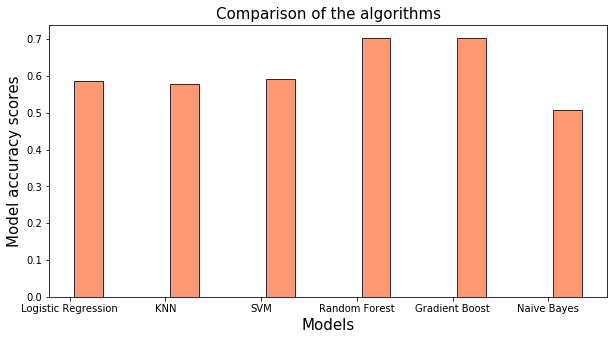

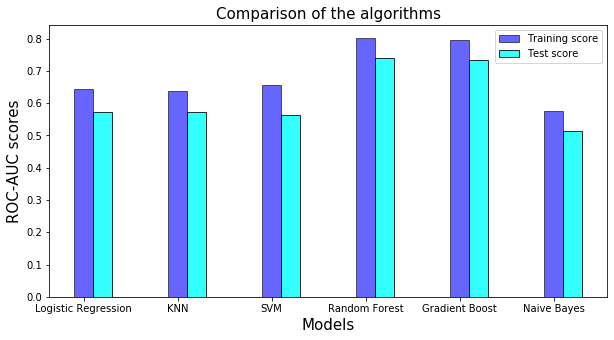

In [41]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

## Applying Grid Search CV To Hyperparameter Tuning 

In [42]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7254561251086012


### Fitting RandomRorest with the optimal hyperparameters

In [44]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.7100694444444444
0.7498182828847199


In [53]:
#Final prediction RF:

target = pd.Series(y_predictions_rf, name='rating')
app_id = df['id']

output = pd.DataFrame(list(zip(app_id, target)), 
               columns =['app_id', 'rating']) 




output.to_csv('final_result_rf.csv', index=False, header=True)

In [66]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab.tail(20))

print(tab.head(10))


                                   Features  Importance scores
4875                                     腾讯           0.000725
4876                       自動更新される際の課金については           0.000731
4877                                自動更新の解除           0.000737
4878                                     英語           0.000739
4879                                     英超           0.000778
4880                                     西甲           0.000796
4881                                     视频           0.000831
4882                                     説明           0.000833
4883                                     订阅           0.000860
4884                                     设置           0.000863
4885                                  请联系我们           0.000890
4886                                     購読           0.000892
4887                                     贴心           0.000901
4888                                     通勤           0.000904
4889  遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん           0

## ROC-AUC Score and the ROC curve:

In [68]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.4363244369590873


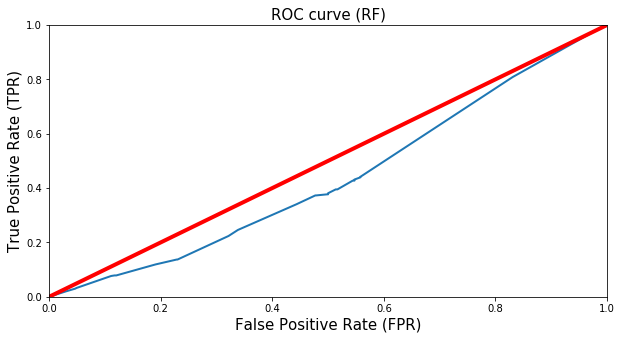

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

## Parameter Tuning for Gradient Boost

In [70]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 24.6min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7112655661743411


## Fitting the Gradient Boost model with the optimal hyperparameters:

In [71]:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.7005208333333334
0.743183774485152


In [73]:
#Final prediction GB:

target = pd.Series(y_predictions_GB, name='rating')
app_id = df['id']

output = pd.DataFrame(list(zip(app_id, target)), 
               columns =['app_ID', 'rating']) 




output.to_csv('final_result_gb.csv', index=False, header=True)

In [78]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab.tail(20))

print(tab.head(10))

                                   Features  Importance scores
4875                                     腾讯           0.001660
4876                       自動更新される際の課金については           0.001670
4877                                自動更新の解除           0.001676
4878                                     英語           0.001693
4879                                     英超           0.001694
4880                                     西甲           0.001786
4881                                     视频           0.001804
4882                                     説明           0.001829
4883                                     订阅           0.001893
4884                                     设置           0.002027
4885                                  请联系我们           0.002080
4886                                     購読           0.002111
4887                                     贴心           0.002224
4888                                     通勤           0.002254
4889  遊んだことがあるかもしれないような無料ゲームや売り切りアプリが盛りだくさん           0

## ROC-AUC Score and the ROC curve:

In [79]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7657294944925255


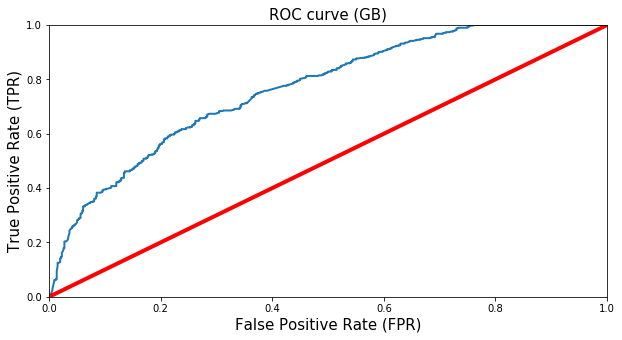

In [83]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()